In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing basic tensorflow modules 
from tensorflow.keras.layers import Dense, Activation 
from tensorflow.keras.models import Model, Sequential 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model   

In [2]:
# True values. We'll use these to calculate our accuracy
n_eff_true = [1.38489, 1.39268, 1.40035, 1.40784, 1.41511, 1.42213, 1.428834, 1.43519, 1.44116, 1.4467]
A_eff_true = [3.04184, 2.90433, 2.78024, 2.66742, 2.56412, 2.46894, 2.38074, 2.29861, 2.22181, 2.14976]
dispersion_true = [42.96, 66.7628, 86.4249, 102.097, 114.007, 122.422 ,127.624 ,129.864 ,129.341 ,126.183]

In [3]:
X_train = pd.read_csv('https://raw.githubusercontent.com/simsekergun/ENEE691/main/homework2/fiber_training_data_X.csv')
y_trains = pd.read_csv('https://raw.githubusercontent.com/simsekergun/ENEE691/main/homework2/fiber_training_data_Y.csv')
X_test = pd.read_csv('https://raw.githubusercontent.com/simsekergun/ENEE691/main/homework2/fiber_testing_data_X.csv')
y_train = y_trains.iloc[:,0]
X_train.shape, y_train.shape, X_test.shape

((978, 4), (978,), (10, 4))

In [4]:
# Let us some functions to normalize, de-normalize, and to calculate errors
def normx(x):
  return (x - train_statsX['mean']) / train_statsX['std']
def norm(y):
  return (y - train_statsY['mean']) / train_statsY['std']
def denorm(y):
  return (y* train_statsY['std'] + train_statsY['mean'])  
def mean_aep(u1,u2):  
  return (round(100*(100*sum(abs((u2-u1)/u1))/len(u1)))/100)
def max_aep(u1,u2):  
  return (round(100*(100*max(abs((u2-u1)/u1))))/100)  

In [5]:
train_statsY = y_train.describe().transpose()
train_statsX = X_train.describe().transpose()
XX = normx(X_train)
YY = norm(y_train)
xx = normx(X_test)

### TASK 1: predict n_eff

In [6]:
YY

0     -3.527949
1     -3.094157
2     -2.654356
3     -2.238347
4     -1.863675
         ...   
973    0.924374
974    0.936871
975    0.948166
976    0.958260
977    0.967152
Name: neff, Length: 978, dtype: float64

In [7]:
# Creating a simple function that builds a fully connected neural network  
def create_model_for1(n_neurons, desired_learning_rate): 
    model = Sequential() 
    model.add(Dense(n_neurons, input_dim=XX.shape[1], activation='sigmoid')) # Layer 1 + activation
    model.add(Dense(n_neurons, activation='relu'))                             # Layer 2 + activation
    model.add(Dense(n_neurons, activation='relu'))                             # Layer 3 + activation
    model.add(Dense(n_neurons, activation='relu'))                             # Layer 4 + activation
    model.add(Dense(1))                                                         # Output layer
    adam = Adam(learning_rate=desired_learning_rate)                              # Choice of optimizer
    # Compiling the model by specifying the choice of loss function ('mse'), and performance metrics
    model.compile(loss='mse', optimizer=adam, metrics=['mse']) 
    return model

In [8]:
# Creating a model with 128 neurons and learning rate 0.001
#del model
model_n = create_model_for1(n_neurons=32, desired_learning_rate=0.001)

In [9]:
# Training the model for "number_of_epochs" epochs
number_of_epochs = 200
model_history = model_n.fit(XX, YY, epochs=number_of_epochs, verbose=0)

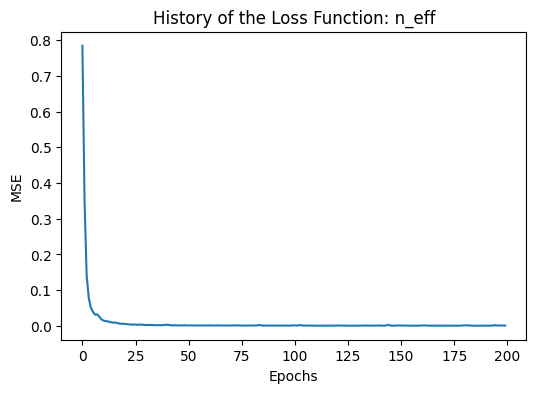

In [10]:
# Plotting the loss function from model's history
plt.figure(figsize=(6,4))
plt.plot(model_history.history['mse'], label = 'train mse')
plt.title('History of the Loss Function: n_eff')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

In [11]:
# let's make a prediction
y_pred = denorm(model_n.predict(xx))
y_pred

1/1 [==============================] - 0s 88ms/step


array([[1.3826191],
       [1.3910208],
       [1.3998173],
       [1.4067283],
       [1.4137497],
       [1.4209534],
       [1.4275306],
       [1.4341618],
       [1.4408015],
       [1.4458236]], dtype=float32)

In [12]:
# Calculate the max absolute error in percentile for n_eff
n_error_max = 100*max(abs(n_eff_true -y_pred.flatten())/n_eff_true)
n_error_max

0.16397385118322189

With linear regression, the max absolute error was around 8%. Here we achieve a max absolute error less than 1%


### TASK 2: predict A_eff

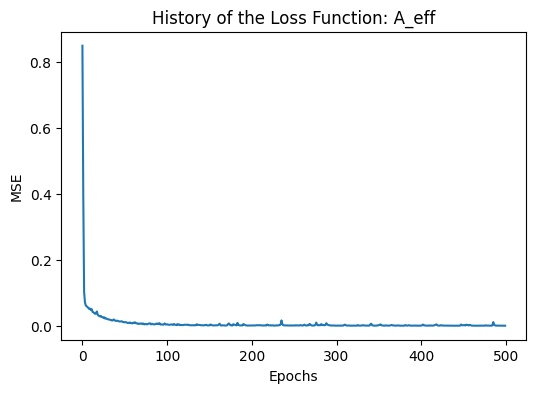

In [13]:
y_train = y_trains.iloc[:,1]
train_statsY = y_train.describe().transpose()
YY = norm(y_train)

model_A = create_model_for1(n_neurons=32, desired_learning_rate=0.001)
# Training the model for "number_of_epochs" epochs
number_of_epochs = 500
model_history2 = model_A.fit(XX, YY, epochs=number_of_epochs, verbose=0)
# Plotting the loss function from model's history
plt.figure(figsize=(6,4))
plt.plot(model_history2.history['mse'], label = 'train mse')
plt.title('History of the Loss Function: A_eff')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

In [14]:
# let's make a prediction
y_pred2 = denorm(model_A.predict(xx))
y_pred2.flatten()

1/1 [==============================] - 0s 85ms/step


array([3.051399 , 2.9192882, 2.7810018, 2.6559997, 2.558154 , 2.4659147,
       2.3730283, 2.2784235, 2.1913488, 2.1287653], dtype=float32)

In [15]:
# Calculate the max absolute error in percentile for A_eff
Aeff_error_max = 100*max(abs(A_eff_true -y_pred2.flatten())/A_eff_true)
Aeff_error_max

1.3710087216082176

With linear regression, the max absolute error was around 13%. Here we achieve a max absolute error less than 2%


TASK 3: predict dispersion

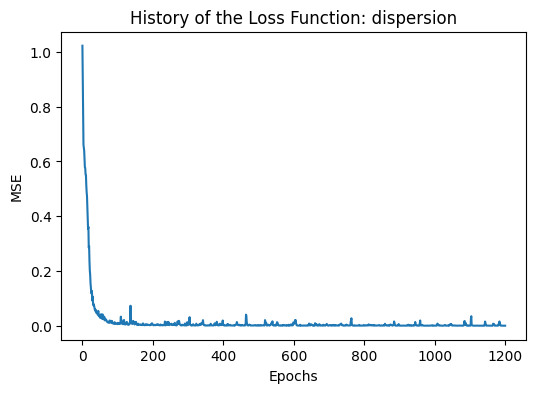

In [16]:
y_train = y_trains.iloc[:,2]
train_statsY = y_train.describe().transpose()
YY = norm(y_train)

model_d = create_model_for1(n_neurons=32, desired_learning_rate=0.001)
# Training the model for "number_of_epochs" epochs
number_of_epochs = 1200
model_history2 = model_d.fit(XX, YY, epochs=number_of_epochs, verbose=0)
# Plotting the loss function from model's history
plt.figure(figsize=(6,4))
plt.plot(model_history2.history['mse'], label = 'train mse')
plt.title('History of the Loss Function: dispersion')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

In [17]:
# let's make a prediction
y_pred3 = denorm(model_d.predict(xx))
y_pred3.flatten()

1/1 [==============================] - 0s 61ms/step


array([ 48.553932,  69.2974  ,  91.69983 , 105.64774 , 117.30295 ,
       129.18857 , 131.39415 , 133.74094 , 130.63287 , 126.93982 ],
      dtype=float32)

In [18]:
# Calculate the max absolute error in percentile for dispersion
dispersion_error_max = 100*max(abs(dispersion_true -y_pred3.flatten())/dispersion_true)
dispersion_error_max

13.02125742537571

With linear regression, the max absolute error was around 100%. Here we achieve a max absolute error less than 15%

In short, when there is non-linearity, neural networks make a difference!

### Task 4

In [19]:
# Creating a simple function that builds a fully connected neural network  
def create_model(n_neurons, desired_learning_rate): 
    model = Sequential() 
    model.add(Dense(n_neurons, input_dim=XX.shape[1], activation='sigmoid')) # Layer 1 + activation
    model.add(Dense(n_neurons, activation='relu'))                             # Layer 2 + activation
    model.add(Dense(n_neurons, activation='relu'))                             # Layer 3 + activation
    model.add(Dense(n_neurons, activation='sigmoid'))                             # Layer 4 + activation
    model.add(Dense(YY.shape[1]))                                            # Output layer
    adam = Adam(learning_rate=desired_learning_rate)                              # Choice of optimizer
    # Compiling the model by specifying the choice of loss function ('mse'), and performance metrics
    model.compile(loss='mse', optimizer=adam, metrics=['mse']) 
    return model

In [20]:
# Creating a model with 128 neurons and learning rate 0.001
#del model
y_train = y_trains.iloc[:,0:3]
train_statsY = y_train.describe().transpose()
YY = norm(y_train)

model = create_model(n_neurons=128, desired_learning_rate=0.001)

In [21]:
# Presenting the summary of the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               640       
                                                                 
 dense_16 (Dense)            (None, 128)               16512     
                                                                 
 dense_17 (Dense)            (None, 128)               16512     
                                                                 
 dense_18 (Dense)            (None, 128)               16512     
                                                                 
 dense_19 (Dense)            (None, 3)                 387       
                                                                 
Total params: 50,563
Trainable params: 50,563
Non-trainable params: 0
_________________________________________________________________


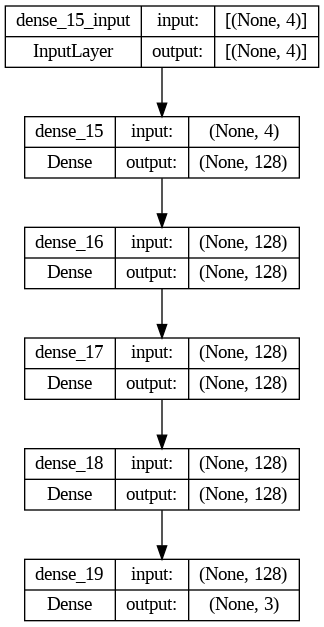

In [22]:
# Visualize the model's structure 
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [23]:
# Training the model for 2000 epochs
number_of_epochs = 2000

model_history = model.fit(XX, YY, epochs=number_of_epochs, verbose=0)

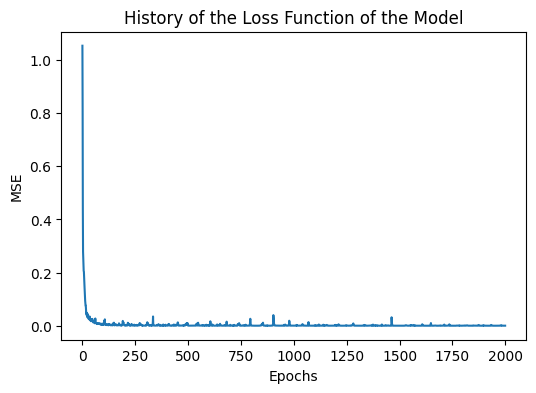

In [24]:
# Plotting the loss function from model's history
plt.figure(figsize=(6,4))
plt.plot(model_history.history['mse'], label = 'train mse')
plt.title('History of the Loss Function of the Model')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

In [25]:
# let's make a prediction
y_pred = denorm(pd.DataFrame(model.predict(xx), columns=YY.columns[0:3]))
y_pred

1/1 [==============================] - 0s 71ms/step


,neff,Aeff\n(um^2),dispersion\n(ps/km.nm)
0,1.385832,2.983885,50.567925
1,1.393633,2.884116,74.619311
2,1.400639,2.784138,92.819537
3,1.408305,2.674994,107.459996
4,1.416164,2.567545,117.999685
5,1.422766,2.471359,124.947094
6,1.428798,2.379599,130.249433
7,1.435340,2.293540,132.872926
8,1.440983,2.221027,131.455206
9,1.446533,2.157012,126.663377


In [26]:
# Calculate the max absolute error in percentile for n_eff
n_error_max = 100*max(abs(n_eff_true -y_pred.iloc[:,0])/n_eff_true)
n_error_max

0.07451172692706226

In [27]:
# Calculate the max absolute error in percentile for A_eff
Aeff_error_max = 100*max(abs(A_eff_true -y_pred.iloc[:,1])/A_eff_true)
Aeff_error_max

1.9052650415360683

In [28]:
# Calculate the max absolute error in percentile for dispersion
dispersion_error_max = 100*max(abs(dispersion_true -y_pred.iloc[:,2])/dispersion_true)
dispersion_error_max

17.709323181748992

If we didn't normalize the datasets properly, we would have much higher errors. But after normalization, we can obtain accurate results even for multi-class regression with neural networks but at the expense of high number of epochs!